# Tiny Tower order of restocking simulation

Let's simulate restock strategies for Tiny Tower.

## Defining the simulator class

First we'll define a class to handle the simulation for a single Tiny Tower floor, assuming that the player has perfect reaction time and will restock the products as soon as possible.

Required inputs to make our simulation work:
* Restocking times for all three products (as a list of three integers)
* Total worker skill in the floor's category to calculate discount (as a single integer)
* Number of dream workers (an integer between 0 and 3)
* Order in which to restock the products (a list consisting of 0, 1 and 2 in an order representing the strategy)

For every minute that would pass in the game, our simulation runs one cycle, updating the stock quantities and coin totals, and checking if a product needs to be restocked or has finished stocking.

In [1]:
class StockSimulator:
    def __init__(self, stock_times, stock_order, worker_discount, dream_workers):
        self.stock_times = stock_times
        self.stock_order = stock_order
        self.worker_discount = worker_discount
        self.dream_workers = dream_workers
        self.total_coins = 0
        self.stocks_over_time = [ [], [], [] ]
        self.cpm_over_time = []
        self.coins_over_time = []
        
    def run_simulation(self, run_duration):
        current_stock = [0, 0, 0]
        currently_stocking = -1
        stock_start_time = 0
        total_coins = 0
        print ("Starting simulation with stock order {}.".format(self.stock_order))
        for t in range(0, run_duration):
            # Calculate cpm, add to coin total and subtract stock quantities
            coins_per_minute = 0
            for product in range(0,3):
                if current_stock[product] > 0:
                    coins_per_minute += 12;
                    stock_sold = 12/(product+1)
                    current_stock[product] -= stock_sold
                self.stocks_over_time[product].append(current_stock[product])
            total_coins += coins_per_minute
            # product finished stocking?
            if currently_stocking > -1 and self.stock_times[currently_stocking] + stock_start_time <= t:
                current_stock[currently_stocking] = self.stock_times[currently_stocking]*36
                if self.dream_workers > currently_stocking:
                    current_stock[currently_stocking] *= 2
                fsb_string = ""
                if min(current_stock) > 0:
                    stock_bonus = math.ceil(sum(current_stock)/10)
                    total_coins += stock_bonus
                    fsb_string = " and received fully stocked bonus of {} coins".format(stock_bonus)
                print ("Product {} stocked at minute {}{}.".format(currently_stocking, t, fsb_string))
                currently_stocking = -1
            # is at least one product empty and none are restocking?
            if min(current_stock) < 1 and currently_stocking < 0:
                # at least one product needs to be restocked
                for product in self.stock_order:
                    if current_stock[product] < 1:
                        currently_stocking = product
                        stock_start_time = t
                        cost = math.ceil(stock_times[product]*10*(100-worker_discount)/100)
                        total_coins -= cost
                        print ("Order product {} at minute {} for {} coins.".format(product, t, cost))
                        break
            self.cpm_over_time.append(coins_per_minute)
            self.coins_over_time.append(total_coins)
            self.total_coins = total_coins

        print ("Simulation finished with {} coins earned in {} minutes.".format(total_coins, run_duration))
        

## Running the first simulation

We define a floor with restocking times of 30, 60 and 90 minutes (e.g. Italian Food floor at level 3) and 3 dreamworkers with a total skill of 27.

Then we simulate 1440 minutes (1 day).

In [2]:
from matplotlib import pyplot as plt
import math

stock_times = [30, 60, 90]
worker_discount = 27
stock_order = [0, 1, 2]
dream_workers = 3
run_duration = 1440
simulation1 = StockSimulator(stock_times, stock_order, worker_discount, dream_workers)
simulation1.run_simulation(run_duration)

Starting simulation with stock order [0, 1, 2].
Order product 0 at minute 0 for 219 coins.
Product 0 stocked at minute 30.
Order product 1 at minute 30 for 438 coins.
Product 1 stocked at minute 90.
Order product 2 at minute 90 for 657 coins.
Product 2 stocked at minute 180 and received fully stocked bonus of 1062 coins.
Order product 0 at minute 210 for 219 coins.
Product 0 stocked at minute 240 and received fully stocked bonus of 1182 coins.
Order product 0 at minute 420 for 219 coins.
Product 0 stocked at minute 450 and received fully stocked bonus of 972 coins.
Order product 0 at minute 630 for 219 coins.
Product 0 stocked at minute 660 and received fully stocked bonus of 762 coins.
Order product 1 at minute 810 for 438 coins.
Product 1 stocked at minute 870.
Order product 0 at minute 870 for 219 coins.
Product 0 stocked at minute 900 and received fully stocked bonus of 990 coins.
Order product 0 at minute 1080 for 219 coins.
Product 0 stocked at minute 1110 and received fully stoc

<IPython.core.display.Javascript object>


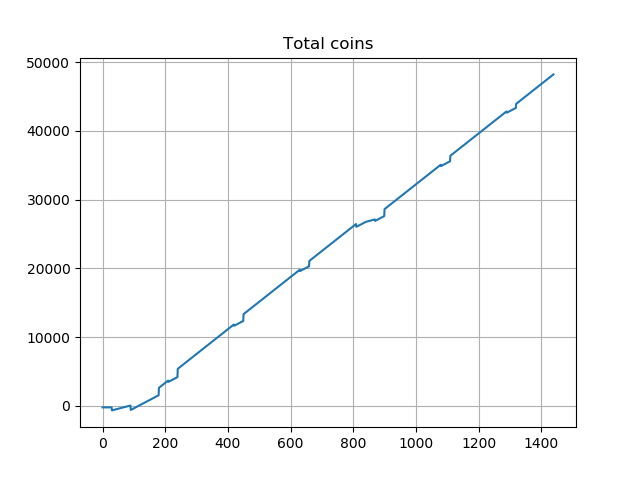

In [3]:
%matplotlib notebook
plt.plot(simulation1.coins_over_time)
plt.title("Total coins")
plt.grid()
plt.show()


<IPython.core.display.Javascript object>


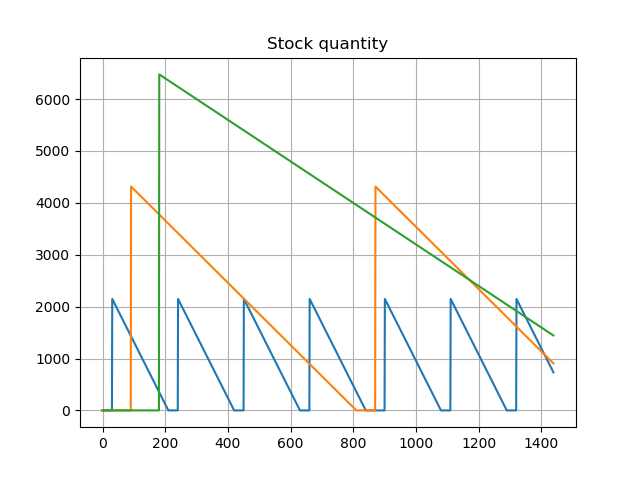

In [4]:
plt.figure()
plt.plot(simulation1.stocks_over_time[0])
plt.plot(simulation1.stocks_over_time[1])
plt.plot(simulation1.stocks_over_time[2])
plt.title("Stock quantity")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


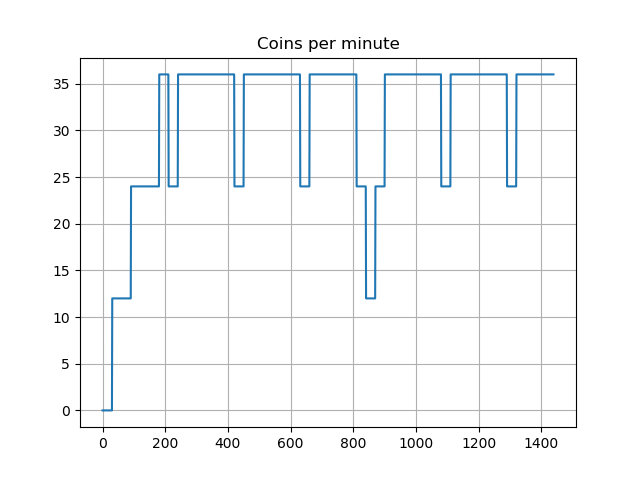

In [5]:
plt.figure()
plt.plot(simulation1.cpm_over_time)
plt.title("Coins per minute")
plt.grid()
plt.show()

## Comparing strategies

Now we'll run a second simulation. Everything is the same as in the first one, except the order is now highest to lowest (2, 1, 0).

In [6]:
stock_order2 = [2, 1, 0]
simulation2 = StockSimulator(stock_times, stock_order2, worker_discount, dream_workers)
simulation2.run_simulation(run_duration)

Starting simulation with stock order [2, 1, 0].
Order product 2 at minute 0 for 657 coins.
Product 2 stocked at minute 90.
Order product 1 at minute 90 for 438 coins.
Product 1 stocked at minute 150.
Order product 0 at minute 150 for 219 coins.
Product 0 stocked at minute 180 and received fully stocked bonus of 1242 coins.
Order product 0 at minute 360 for 219 coins.
Product 0 stocked at minute 390 and received fully stocked bonus of 1032 coins.
Order product 0 at minute 570 for 219 coins.
Product 0 stocked at minute 600 and received fully stocked bonus of 822 coins.
Order product 0 at minute 780 for 219 coins.
Product 0 stocked at minute 810 and received fully stocked bonus of 612 coins.
Order product 1 at minute 870 for 438 coins.
Product 1 stocked at minute 930 and received fully stocked bonus of 816 coins.
Order product 0 at minute 990 for 219 coins.
Product 0 stocked at minute 1020 and received fully stocked bonus of 870 coins.
Order product 0 at minute 1200 for 219 coins.
Product

<IPython.core.display.Javascript object>


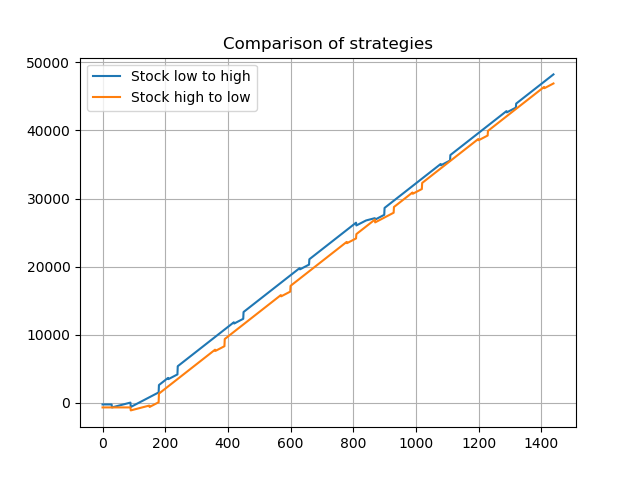

In [7]:
plt.figure()
plt.plot(simulation1.coins_over_time, label="Stock low to high")
plt.plot(simulation2.coins_over_time, label="Stock high to low")
plt.grid()
plt.legend()
plt.title("Comparison of strategies")
plt.show()